<a href="https://colab.research.google.com/github/bastiansosa/data-visualization/blob/main/PreProcesamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pre Procesamiento de datos

Este Notebook contiene algunos ejemplos mediante código de algunas técnicas de pre proccesamiento  con Pandas

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
import matplotlib.pyplot as plt
import pylab as pl
from pandas import ExcelWriter
from pandas import ExcelFile
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import os

#Primero se cargan los datos desde un excel
df = pd.read_excel('prototiposSoloID1.xlsx')
df.describe()

,UV,TA,HA,V,DV,HS
count,53962.000000,53962.00000,53962.000000,53962.000000,53962.000000,53962.000000
mean,1.063405,18.57555,68.295156,0.123641,123.828120,31.188040
std,2.865885,8.34668,23.925741,0.627468,115.963636,8.599704
min,0.000000,-0.34000,0.000000,0.000000,-1.000000,0.000000
25%,0.340000,12.11000,46.300000,0.000000,45.000000,26.000000
50%,0.370000,16.59000,72.320000,0.000000,90.000000,31.000000
75%,0.410000,25.36000,91.010000,0.000000,225.000000,36.000000
max,16.530000,38.90000,104.230000,8.900000,338.000000,100.000000


In [ ]:
#Vamos a observar cuantos datos hay de entrada junto con el tipo de dato
#Poner atención que se identificó una columna tipo datetime
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53962 entries, 0 to 53961
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   created_at  53962 non-null  datetime64[ns]
 1   UV          53962 non-null  float64       
 2   TA          53962 non-null  float64       
 3   HA          53962 non-null  float64       
 4   V           53962 non-null  float64       
 5   DV          53962 non-null  int64         
 6   HS          53962 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 2.9 MB


# Visualización Inicial

Primero vamos a plotear alguna de las variables a lo largo del tiempo. En este caso HS es humedad del suelo

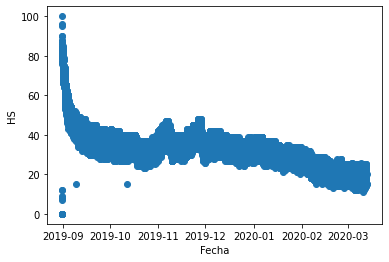

In [ ]:

import matplotlib.pyplot as plt
plt.scatter(df.created_at, df.HS)
plt.xlabel("Fecha")
plt.ylabel("HS")
plt.show()

# Agregación
La agregación permite tener agrupar elementos por alguna variable. Pandas tiene la versatilidad de groupby para generar crear datos agrupados por alguna función como media (mean) o desviación estándar (std). La nomenclatura es:
<ul>
    <li>dataframe.groupby(Criterio o columna de agrupamiento).funciondeagrupamient() </li>
</ul>
En este caso la fecha es un factor de agrupamiento que puede ser utilizado. A continuación se agrupará la fecha por semana y por día.<br>
La sentencia <b>df.created_at.dt.isocalendar().week</b> permite extraer por semana las semanas del dato tipo fecha. Idealmente, se debe extraer el criterio de agrupamiento. <br>
Por otro lado, <b>df.created_at.dt.day</b> permite extraer cada día presente en la columna created_at.

In [ ]:
#En este caso se obtiene la media por semana de todos los datos.
df.groupby(df.created_at.dt.isocalendar().week).mean()

,UV,TA,HA,V,DV,HS
week,,,,,,
1,0.630288,20.032183,71.811838,0.009372,110.065396,31.685376
2,1.704312,20.883696,62.265411,0.000000,133.186345,29.941992
3,1.796083,21.916232,65.195303,0.000000,100.559548,28.487680
4,0.926146,22.371678,71.061398,0.000000,99.803600,27.483854
5,1.419722,21.934341,71.350191,0.000000,102.383625,26.558702
6,4.436543,20.747033,61.517719,0.000000,119.381837,23.700722
7,1.233079,21.130072,66.125175,0.000000,99.468589,21.144696
8,2.486480,20.150534,68.649080,0.000000,119.241521,19.492806
9,1.677610,19.636672,73.886738,0.000000,104.411795,19.057949


In [ ]:
df.groupby(df.created_at.dt.day).std()

,UV,TA,HA,V,DV,HS
created_at,,,,,,
1,1.520949,7.467310,22.229067,0.543538,109.584638,15.447117
2,0.752875,8.164339,23.258371,0.420443,103.572473,13.263287
3,3.040138,8.534627,24.090511,0.000000,110.104493,10.654464
4,3.926018,8.365361,22.258394,0.000000,118.199264,9.835959
5,4.430816,8.232580,22.610346,0.102832,123.901705,9.535373
6,3.131948,8.246986,24.986101,0.866370,123.576650,9.470478
7,3.821761,8.584374,24.575588,1.152244,108.179570,9.063878
8,3.741736,8.179879,23.584134,0.747177,117.009441,8.725162
9,3.460777,8.287789,25.305253,0.889651,120.853554,8.465201


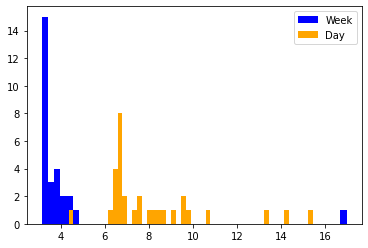

In [ ]:
#Vamos a revisar la variabilidad de la variable HS para observar que efecto tuvo agrupar por semana vs por día
plt.hist(df.groupby(df.created_at.dt.isocalendar().week)["HS"].std(),bins=50, color="blue",label="Week");
plt.hist(df.groupby(df.created_at.dt.day)["HS"].std(),bins=50,color="orange", label="Day");
plt.legend();

# Muestreo o Sample
Python tiene la función sample para poder generar un muestreo. Algunos ejemplos.
<ul>
    <li><b>dataframe.sample(n=4)</b>: Permite obtener 4 filas aleatoreas</li>
    <li><b>dataframe.sample(frac=0.5, replace=True)</b>: Permite obtener el 50\% de las filas aleatoreas con posibilidad de reemplazo</li>
</ul>
No existe una forma estratificada por defecto, hay que construir una.

In [ ]:
df1=df.sample(frac=0.5, replace=False)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26981 entries, 36787 to 40665
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   created_at  26981 non-null  datetime64[ns]
 1   UV          26981 non-null  float64       
 2   TA          26981 non-null  float64       
 3   HA          26981 non-null  float64       
 4   V           26981 non-null  float64       
 5   DV          26981 non-null  int64         
 6   HS          26981 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 1.6 MB


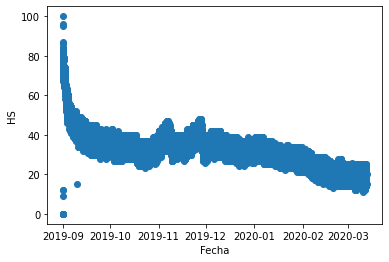

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df1.created_at, df1.HS)
plt.xlabel("Fecha")
plt.ylabel("HS")
plt.show()

# Discretización
Pandas permite discritizar utilizando bins. Le método cut permite etiquetar utilizando la variable de entrada, el número de bins y las etiquetas.
<ul>
    <li><b>pd.cut(dataFrame[Columna],nroBins,Etiquetas)</b>: Genera una nueva columna con las etiquetas definidas en el numero de bins</li>
    <li><b>pd.cut(df['HS'],3,labels=['Bajo',"Medio",'Alto'])</b>:Genera una columna con 3 valores</li>
</ul>

In [ ]:
df['HS_Ordinal_3']=pd.cut(df['HS'],3,labels=['Bajo',"Medio",'Alto'])
df['HS_Ordinal_5']=pd.cut(df['HS'],5,labels=['Bajo',"Medio Bajo","Neutro",'Medio','Alto'])



In [ ]:
df.head()

,created_at,UV,TA,HA,V,DV,HS,HS_Ordinal_3,HS_Ordinal_5
0,2019-08-31 17:33:43,0.42,24.85,33.16,0.0,45,0,Bajo,Bajo
1,2019-08-31 17:34:07,0.42,24.84,35.54,0.0,45,0,Bajo,Bajo
2,2019-08-31 17:34:30,0.43,24.83,33.87,0.0,0,0,Bajo,Bajo
3,2019-08-31 17:34:54,0.43,24.85,34.47,0.0,113,0,Bajo,Bajo
4,2019-08-31 17:35:17,0.43,24.86,33.80,0.0,158,0,Bajo,Bajo


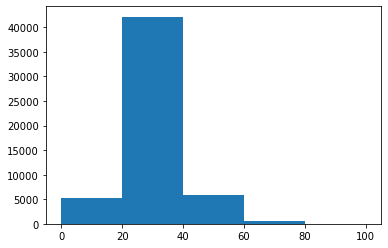

In [ ]:
plt.hist(df["HS"],bins=5);

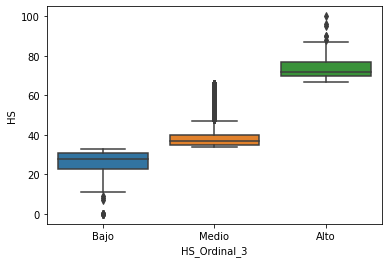

In [ ]:
import seaborn as sb

sb.boxplot(x="HS_Ordinal_3", y="HS", data=df);



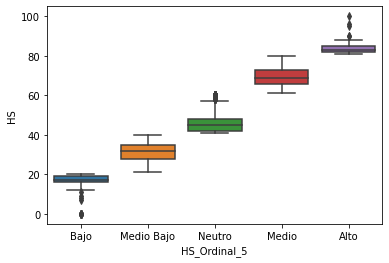

In [ ]:
sb.boxplot(x="HS_Ordinal_5", y="HS", data=df);

# ¿Será posible discretizar mejor?
Existen dos funciones interesantes qcut y KBinsDiscretizer:
<ul>
    <li><b>qcut</b>: Funciona similar a cut pero utilizando quantiles</li>
    <li><b>KBinsDiscretizer</b>:Método no supervisado que busca particiones uniformes, quantiles o con kmedio</li>
</ul>

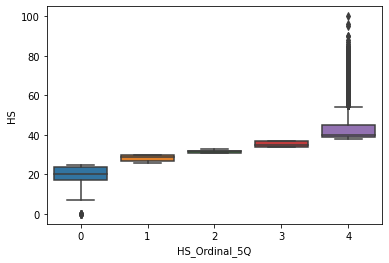

In [ ]:
df['HS_Ordinal_5Q']=pd.qcut(df['HS'],5,labels=False)

sb.boxplot(x="HS_Ordinal_5Q", y="HS", data=df);

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
kbins = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans')
df['HS_KB_5'] = kbins.fit_transform(df[['HS']])
df.head()

,created_at,UV,TA,HA,V,DV,HS,HS_Ordinal_3,HS_Ordinal_5,HS_KB_5,HS_Ordinal_5Q
0,2019-08-31 17:33:43,0.42,24.85,33.16,0.0,45,0,Bajo,Bajo,0.0,0
1,2019-08-31 17:34:07,0.42,24.84,35.54,0.0,45,0,Bajo,Bajo,0.0,0
2,2019-08-31 17:34:30,0.43,24.83,33.87,0.0,0,0,Bajo,Bajo,0.0,0
3,2019-08-31 17:34:54,0.43,24.85,34.47,0.0,113,0,Bajo,Bajo,0.0,0
4,2019-08-31 17:35:17,0.43,24.86,33.80,0.0,158,0,Bajo,Bajo,0.0,0


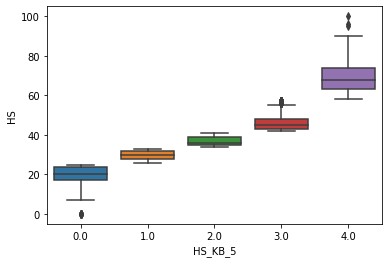

In [ ]:
sb.boxplot(x="HS_KB_5", y="HS", data=df);

# Normalización y Transformación
Una transformación de atributos es una función que asigna todo el conjunto de valores de un atributo determinado a un nuevo conjunto de valores de sustitución, de forma que cada valor antiguo pueda identificarse con uno de los nuevos valores. 


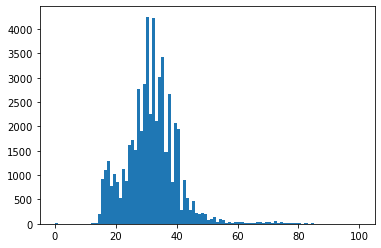

In [ ]:
plt.hist(df["HS"],bins=100);

In [ ]:
df["HS_Log"]=np.log10(df["HS"]+0.01)

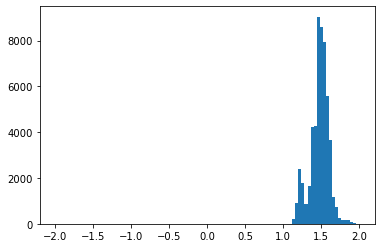

In [ ]:
plt.hist(df["HS_Log"],bins=100);

In [ ]:
from scipy import stats
df["HS_Z"]=stats.zscore(df["HS"])

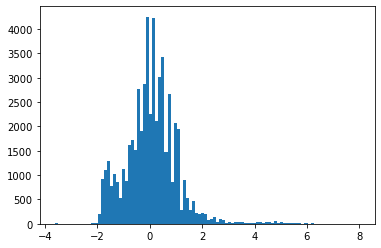

In [ ]:
plt.hist(df["HS_Z"],bins=100);